<a href="https://colab.research.google.com/github/nikhil-xyz/ImageClassification/blob/main/Chessman_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The model will try to predict the chessman name by looking at its image

In [348]:
!git clone https://github.com/nikhil-xyz/ImageClassification.git

fatal: destination path 'ImageClassification' already exists and is not an empty directory.


In [349]:
!mkdir -p ~/.kaggle
!cp ImageClassification/kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [350]:
!kaggle datasets download -d niteshfre/chessman-image-dataset

chessman-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [351]:
import zipfile 
zip_ref = zipfile.ZipFile('/content/chessman-image-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Importing Dependencies

In [352]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [353]:
path = os.path.join('Chessman-image-dataset', 'Chess')

In [354]:
path

'Chessman-image-dataset/Chess'

In [355]:
import imghdr
image_exts = ['jpeg', 'jpg', 'bmp', 'png']
for image_class in os.listdir(os.path.join(path)):
  for image in os.listdir(os.path.join(path, image_class)):
    image_path = os.path.join(path, image_class, image)
    # img = cv2.imread(image_path)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plt.imshow(img)
    tip = imghdr.what(image_path)
    if tip not in image_exts:
      os.remove(image_path)

Generator

In [356]:
data = tf.keras.utils.image_dataset_from_directory(os.path.join(path))
data = data.map(lambda x, y : (x/255, y))

Found 542 files belonging to 6 classes.


In [357]:
tf.keras.utils.image_dataset_from_directory

<function keras.utils.image_dataset.image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, **kwargs)>

In [358]:
len(data)

17

In [359]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2) + 1
test_size = int(len(data) * 0.1) + 1
print(train_size, val_size, test_size)

11 4 2


In [360]:
train = data.take(train_size)
validation = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

Model Building

In [361]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (256, 256, 3)),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(256, (3 , 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(512, (3 , 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, (3 , 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'sigmoid')
])

In [362]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [363]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 125, 125, 128)     36992     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 62, 62, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 60, 60, 256)       295168    
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 30, 30, 256)    

In [364]:
history = model.fit(train, epochs = 30, validation_data = validation)

Epoch 1/30
11/11 [==============================] - 9s 468ms/step - loss: 1.8567 - accuracy: 0.1676 - val_loss: 1.7854 - val_accuracy: 0.1562
Epoch 2/30
11/11 [==============================] - 7s 498ms/step - loss: 1.7933 - accuracy: 0.1875 - val_loss: 1.7823 - val_accuracy: 0.2031
Epoch 3/30
11/11 [==============================] - 7s 502ms/step - loss: 1.7889 - accuracy: 0.2159 - val_loss: 1.7886 - val_accuracy: 0.2266
Epoch 4/30
11/11 [==============================] - 7s 494ms/step - loss: 1.7933 - accuracy: 0.1733 - val_loss: 1.7862 - val_accuracy: 0.2344
Epoch 5/30
11/11 [==============================] - 7s 484ms/step - loss: 1.7772 - accuracy: 0.1875 - val_loss: 1.7507 - val_accuracy: 0.2109
Epoch 6/30
11/11 [==============================] - 8s 581ms/step - loss: 1.7783 - accuracy: 0.1960 - val_loss: 1.7469 - val_accuracy: 0.3281
Epoch 7/30
11/11 [==============================] - 7s 487ms/step - loss: 1.7306 - accuracy: 0.2670 - val_loss: 1.6738 - val_accuracy: 0.3125
Epoch 

In [365]:
# y_pred = model.predict(test)
# y_pred = [np.argmax(y) for y in y_pred]

In [366]:
classes = ['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']

In [367]:
print(len(test))

2


Predicting Few Classes

1/1 [==============================] - 0s 16ms/step


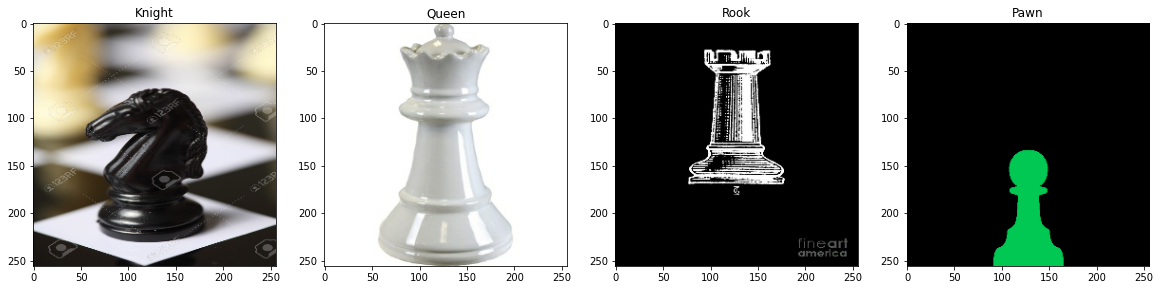

In [368]:
iter = test.as_numpy_iterator()
batch = iter.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for index in range(4):
  ax[index].imshow(np.squeeze(batch[0][index]))
  pred = np.argmax(model.predict(np.expand_dims(batch[0][index], 0)))
  ax[index].title.set_text(classes[pred])

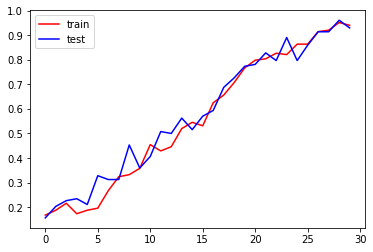

In [369]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='test')
plt.legend()
plt.show()

In [370]:
labels = []
y_pred = []
iter = test.as_numpy_iterator()
for i in range(len(test)):
  batch = iter.next()
  labels.extend(batch[1])
  temp = model.predict(batch[0])
  temp = [np.argmax(y) for y in temp]
  y_pred.extend(temp)

1/1 [==============================] - 1s 705ms/step


In [371]:
labels = np.array(labels)
y_pred = np.array(y_pred)
print(labels)
print(y_pred)

[3 5 0 5 1 0 5 0 2 5 2 2 3 0 3 5 0 2 0 2 1 1 1 0 2 3 1 3 2 3 5 5 4 5 0 1 2
 2 3 4 3 4 3 0 5 1 2 2 2 5 2 1 4 2 3 2 3 3 5 5 4 0]
[3 5 0 5 1 0 5 0 2 5 2 2 3 0 3 5 0 2 0 2 4 4 1 0 2 3 1 3 2 3 5 5 4 5 0 1 2
 2 3 4 3 4 3 0 5 1 2 2 2 5 2 1 4 2 3 2 3 3 5 5 4 0]


In [372]:
cm = tf.math.confusion_matrix(labels = labels, predictions = y_pred, num_classes=6)

In [373]:
print(cm)

tf.Tensor(
[[10  0  0  0  0  0]
 [ 0  6  0  0  2  0]
 [ 0  0 15  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  0 12]], shape=(6, 6), dtype=int32)


Drawing Heatmap

Text(69.0, 0.5, 'True')

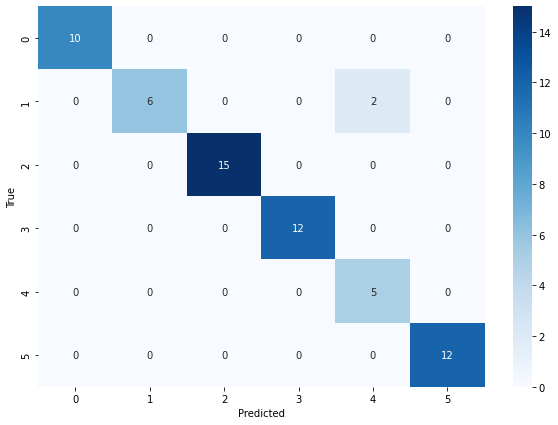

In [374]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

Deploying with Gradio

In [375]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [376]:
def predict_image(img_input):
  img_input = cv2.resize(img_input, (256, 256))
  img_input = cv2.cvtColor(img_input, cv2.COLOR_BGR2RGB)
  result = model.predict(np.expand_dims(img_input/255.0, 0))
  return {classes[i] : float(result[0][i]) for i in range(len(classes))}

In [377]:
import gradio as gr
in_img = gr.inputs.Image()
out_label = gr.outputs.Label(num_top_classes=len(classes))
gr.Interface(fn=predict_image, inputs=in_img, outputs=out_label).launch(share=True)

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://8de0f473-4d2b-4a47.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
